# Inference and Evaluation

Evaluate the complete WeatherAdapt-STR system


In [13]:
from pathlib import Path
from PIL import Image
from tqdm import tqdm
from src.preprocessing import get_text_preprocessing_pipeline
from api.inference import WeatherAdaptSTR

# correct absolute path
test_images_dir = Path(r'C:/Users/HP/Downloads/nlp-all/NLP-20251121T193818Z-1-001/NLP/outputs/processed_data/weather_augmented_text')

print("Looking for images in:", test_images_dir)
print("Exists?", test_images_dir.exists())

test_images = list(test_images_dir.glob("*.jpg"))
print("Files found:", len(test_images))

# load model
model = WeatherAdaptSTR(
    weather_model_path=config.MODELS_DIR / 'weather_classifier_best.pth',
    text_model_path=None  # ignore text model for now because vocab mismatch
)

transform = get_text_preprocessing_pipeline((32, 128))
results = []

for img_path in tqdm(test_images[:50], desc="Evaluating"):
    try:
        # Load raw PIL image only
        img = Image.open(img_path).convert('RGB')

        # WeatherAdaptSTR.predict will handle its own transforms
        pred = model.predict(img)

        results.append(pred)

    except Exception as e:
        print("Error on", img_path, ":", e)

print("\nEvaluated", len(results), "images")

# results = []

# for img_path in tqdm(test_images[:50], desc="Evaluating"):
#     try:
#         img = Image.open(img_path).convert('RGB')
#         img_tensor = transform(img).unsqueeze(0)

#         pred = model.predict(img_tensor)
#         results.append(pred)
#     except Exception as e:
#         print("Error on", img_path, ":", e)

print("\nWeather Classification Distribution:")
weather_classes = [r['weather_class'] for r in results]
for wc in set(weather_classes):
    print(f"{wc}: {weather_classes.count(wc)}")

print("\nEvaluated", len(results), "images")


Looking for images in: C:\Users\HP\Downloads\nlp-all\NLP-20251121T193818Z-1-001\NLP\outputs\processed_data\weather_augmented_text
Exists? True
Files found: 835
Loaded weather classifier from c:\Users\HP\Downloads\nlp-all\NLP-20251121T193818Z-1-001\NLP\outputs\models\weather_classifier_best.pth
Text recognition will use random initialization


Evaluating: 100%|██████████| 50/50 [00:02<00:00, 19.86it/s]


Evaluated 50 images

Weather Classification Distribution:
fog: 13
rain: 12
snow: 13
haze: 12

Evaluated 50 images


Adaptive Routing Result:
  Weather Class: fog
  Weather Confidence: 58.84%
  Recognized Text: RK}


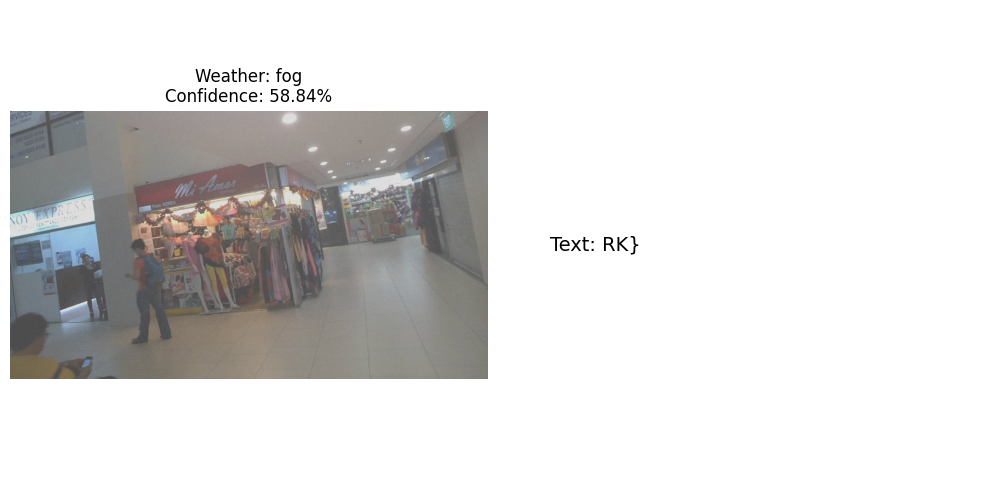

In [52]:
# Test on sample image
import matplotlib.pyplot as plt
sample_img_path =  Path(r'C:/Users/HP/Downloads/nlp-all/NLP-20251121T193818Z-1-001/NLP/outputs/processed_data/weather_augmented_text')
if sample_img_path.exists():
    img_files = list(sample_img_path.glob('*.jpg'))
    if img_files:
        img = Image.open(img_files[101]).convert('RGB')
        
        # Run adaptive prediction
        result = model.predict(img)
        
        print("Adaptive Routing Result:")
        print(f"  Weather Class: {result['weather_class']}")
        print(f"  Weather Confidence: {result['weather_confidence']:.2%}")
        print(f"  Recognized Text: {result['recognized_text']}")
        
        # Visualize
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title(f"Weather: {result['weather_class']}\nConfidence: {result['weather_confidence']:.2%}")
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.text(0.1, 0.5, f"Text: {result['recognized_text']}", 
                fontsize=14, verticalalignment='center')
        plt.axis('off')
        plt.tight_layout()
        plt.show()


In [ ]:
import sys
sys.path.append('src')
sys.path.append('api')
sys.path.append('models')
from pathlib import Path
from PIL import Image
import json
from tqdm import tqdm

sys.path.append(str(Path.cwd().parent))
import config
from api.inference import WeatherAdaptSTR
from src.utils import calculate_accuracy

# Load model
weather_model_path = config.MODELS_DIR / 'weather_classifier_best.pth'
text_model_path = config.MODELS_DIR / 'text_recognizer_best.pth'

model = WeatherAdaptSTR(
    weather_model_path=weather_model_path if weather_model_path.exists() else None,
    text_model_path=text_model_path if text_model_path.exists() else None
)

# Evaluate on test set
# test_images_dir = 'NLP\outputs\processed_data\weather_augmented_text'
test_images_dir = Path(r'NLP/outputs/processed_data/weather_augmented_text')
test_images = list(test_images_dir.glob('*.jpg'))[:50]

# test_images = list(test_images_dir.glob('*.jpg'))[:50]  # Sample
test_images_dir = Path(r'C:/Users/HP/Downloads/nlp-all/NLP-20251121T193818Z-1-001/NLP/outputs/processed_data/weather_augmented_text')


print("Looking for images in:", test_images_dir.resolve())
print("Exists?", test_images_dir.exists())

print("Files found:", len(list(test_images_dir.glob('*'))))
print("JPG found:", len(list(test_images_dir.glob('*.jpg'))))
from src.preprocessing import get_text_preprocessing_pipeline

transform = get_text_preprocessing_pipeline((32, 128))
results = []

for img_path in tqdm(test_images, desc="Evaluating"):
    try:
        img = Image.open(img_path).convert('RGB')

        # preprocess
        img_tensor = transform(img).unsqueeze(0)

        # predict
        result = model.predict(img_tensor)
        results.append(result)
    except Exception as e:
        print("Error:", img_path, e)


# results = []
# for img_path in tqdm(test_images, desc="Evaluating"):
#     img = Image.open(img_path).convert('RGB')
#     result = model.predict(img)
#     results.append(result)

# Print summary
weather_classes = [r['weather_class'] for r in results]
print(f"\nWeather Classification Distribution:")
for wc in set(weather_classes):
    print(f"  {wc}: {weather_classes.count(wc)}")

print(f"\nEvaluated {len(results)} images")
